In [165]:
#考虑一个具有两个隐藏层的神经网络，结构如下：

#一个输入节点 (x) (但我们会输入一个批次的 (X))
#第一个隐藏层，包含 2 个 神经元 (h^{(1)}_1, h^{(1)}_2)，均使用 ReLU 激活函数。
#第二个隐藏层，包含 2 个 神经元 (h^{(2)}_1, h^{(2)}_2)，均使用 ReLU 激活函数。
#一个输出节点 (y_{pred})，使用 Sigmoid 激活函数。

In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
#添加relu函数
def relu(a):
  return np.maximum(0, a)

In [168]:
#添加sigmoid激活函数
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

In [169]:
#前向传播，计算y_pred输出
def forward(w1, w2, w3, b1, b2, b3, x):
  z1 = np.dot(x, w1) + b1 #shape (2,2)
  h1 = relu(z1) #shape (2,2)

  z2 = np.dot(h1, w2) + b2 #shape (2,2)
  h2 = relu(z2)

  zout = np.dot(h2, w3) + b3 #shape (2,1)
  y_pred = sigmoid(zout) #shape (2,1)
  return y_pred, z1, z2, h1, h2

In [170]:
#求损失函数loss
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

In [171]:
#反向传播，计算梯度
def backward(y_pred, y_true, h1, h2, z1, z2, w2, w3, x):
  dzout = (y_pred - y_true) * y_pred * (1- y_pred) #shape (2,1)
  b3_grad = np.mean(dzout, axis=0, keepdims=True).flatten()
  w3_grad = np.dot(h2.T, dzout) #shape (2,1)

  dh2 = np.dot(dzout, w3.T) #shape (2,2)
  dz2 = dh2 * (z2>0)
  b2_grad = np.mean(dz2, axis=0, keepdims=True)
  w2_grad = np.dot(h1.T, dz2) #shape (2,2)

  dh1 = np.dot(dz2, w2.T) #shape (2,2)
  dz1 = dh1 * (z1>0) #shape(2,2)
  b1_grad = np.mean(dz1, axis=0, keepdims=True)
  w1_grad = np.dot(x.T, dz1) #shape (1,2)
  return w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad

In [172]:
#更新参数,weight, bias
def update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate):
  w1 -= learning_rate * w1_grad
  w2 -= learning_rate * w2_grad
  w3 -= learning_rate * w3_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  b3 -= learning_rate * b3_grad
  return w1, w2, w3, b1, b2, b3

Epoch: 1 loss: [0.     0.0519] y_pred [0.5954 0.5777] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.7] b1: [ 0.1 -0.1] b2: [-0.2  0.3] b3: [0.1]
Epoch: 101 loss: [0.0001 0.0464] y_pred [0.6146 0.5955] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.7] b1: [ 0.1 -0.1] b2: [-0.2  0.3] b3: [0.1]
Epoch: 201 loss: [0.0005 0.0416] y_pred [0.6314 0.6115] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.7] b1: [ 0.1 -0.1] b2: [-0.2  0.4] b3: [0.2]
Epoch: 301 loss: [0.0011 0.0376] y_pred [0.6458 0.6259] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.8] b1: [ 0.1 -0.1] b2: [-0.2  0.4] b3: [0.2]
Epoch: 401 loss: [0.0017 0.0341] y_pred [0.6583 0.6387] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.8] b1: [ 0.1 -0.1] b2: [-0.2  0.4] b3: [0.2]
Epoch: 501 loss: [0.0024 0.0312] y_pred [0.6688 0.6502] w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.8] b1: [ 0.1 -0. ] b2: [-0.2  0.4] b3: [0.2]
Epoch: 601 loss: [0.003  0.0287] y_pred [0.6776 0.6604] w1: [0.2 0.4] w2: [ 0.

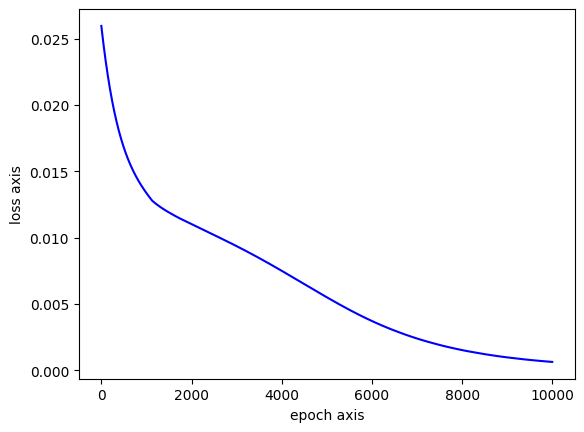

In [173]:
#参数初始化
w1 = np.array([[0.2, 0.3]])

b1 = np.array([[0.1, -0.1]])

w2 = np.array([[0.4, -0.1],
        [0.2, 0.5]])

b2 = np.array([[-0.2, 0.3]])

w3 = np.array([[-0.6],
        [0.7]])

b3 = np.array([0.1])

x = np.array([[1.5],
        [0.5]])

y_true = np.array([[0.6],
          [0.9]])

learning_rate = 0.01
epochs = 10000
losses = []

for epoch in range(epochs):
  y_pred, z1, z2, h1, h2 = forward(w1, w2, w3, b1, b2, b3, x)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss.flatten().mean())

  w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad = backward(y_pred, y_true, h1, h2, z1, z2, w2, w3, x)
  w1, w2, w3, b1, b2, b3 = update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate)

  if epoch%100 == 0:
    print("Epoch:", epoch + 1,
      "loss:", np.round(loss.flatten(), 4),
      "y_pred", np.round(y_pred.flatten(), 4),
      "w1:", np.round(w1.flatten(), 1),
      "w2:", np.round(w2.flatten(), 1),
      "w3:", np.round(w3.flatten(), 1),
      "b1:", np.round(b1.flatten(), 1),
      "b2:", np.round(b2.flatten(), 1),
      "b3:", np.round(b3.flatten(), 1)
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()

In [174]:
import torch
import matplotlib.pyplot as plt

In [175]:
#前向传播，求输出y_pred
def forward(w1, w2, w3, b1, b2, b3, x):
  z1 = torch.matmul(x, w1) + b1 #shape (2,2)
  h1 = torch.relu(z1) #shape (2,2)

  z2 = torch.matmul(h1, w2) + b2 #shape (2,2)
  h2 = torch.relu(z2)

  zout = torch.matmul(h2, w3) + b3 #shape (2,1)
  y_pred = torch.sigmoid(zout) #shape (2,1)
  return y_pred

In [176]:
#求损失函数loss
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

Epoch: 1 loss: 0.0260 y_pred: 0.5866 w1: [0.2 0.3] w2: [ 0.4 -0.1  0.2  0.5] w3: [-0.6  0.7] b1: [ 0.1 -0.1] b2: [-0.2  0.3] b3: [0.1]
Epoch: 101 loss: 0.0234 y_pred: 0.6031 w1: [0.2  0.31] w2: [ 0.4  -0.09  0.2   0.5 ] w3: [-0.6   0.71] b1: [ 0.1  -0.09] b2: [-0.2   0.33] b3: [0.14]
Epoch: 201 loss: 0.0214 y_pred: 0.6178 w1: [0.2  0.31] w2: [ 0.4  -0.09  0.2   0.5 ] w3: [-0.6   0.72] b1: [ 0.1  -0.07] b2: [-0.2   0.35] b3: [0.17]
Epoch: 301 loss: 0.0197 y_pred: 0.6309 w1: [0.2  0.32] w2: [ 0.4  -0.09  0.2   0.5 ] w3: [-0.6   0.73] b1: [ 0.09 -0.06] b2: [-0.2   0.37] b3: [0.2]
Epoch: 401 loss: 0.0184 y_pred: 0.6424 w1: [0.2  0.32] w2: [ 0.4  -0.08  0.2   0.5 ] w3: [-0.6   0.75] b1: [ 0.09 -0.05] b2: [-0.19  0.39] b3: [0.23]
Epoch: 501 loss: 0.0173 y_pred: 0.6526 w1: [0.2  0.32] w2: [ 0.4  -0.08  0.2   0.51] w3: [-0.6   0.75] b1: [ 0.09 -0.04] b2: [-0.19  0.41] b3: [0.25]
Epoch: 601 loss: 0.0164 y_pred: 0.6616 w1: [0.21 0.33] w2: [ 0.41 -0.08  0.21  0.51] w3: [-0.6   0.76] b1: [ 0.09 -0

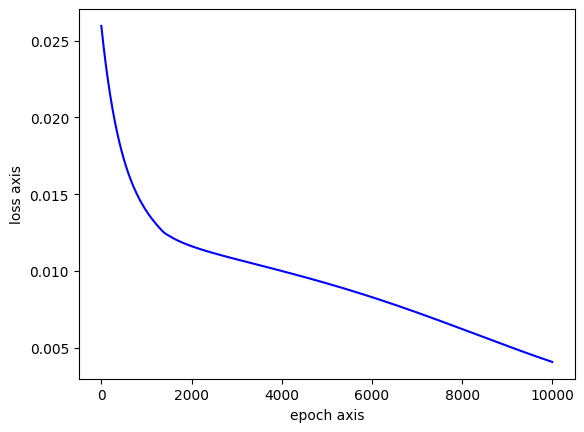

In [177]:
w1 = torch.tensor([[0.2, 0.3]],requires_grad=True)

b1 = torch.tensor([[0.1, -0.1]],requires_grad=True)

w2 = torch.tensor([[0.4, -0.1],
          [0.2, 0.5]],requires_grad=True)

b2 = torch.tensor([[-0.2, 0.3]],requires_grad=True)

w3 = torch.tensor([[-0.6],
          [0.7]],requires_grad=True)

b3 = torch.tensor([0.1],requires_grad=True)

x = torch.tensor([[1.5],
          [0.5]])

y_true = torch.tensor([[0.6],
            [0.9]])

learning_rate = 0.01
epochs = 10000

losses = []

for epoch in range(epochs):
  y_pred = forward(w1, w2, w3, b1, b2, b3, x)
  loss = compute_loss(y_pred, y_true)
  #loss = torch.mean(compute_loss(y_pred, y_true), axis=0, keepdims=True).flatten()
  losses.append(torch.mean(loss, axis=0, keepdims=True).flatten().item())

  if w1.grad is not None:
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
    b3.grad.zero_()

  loss.mean().backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w3 -= learning_rate * w3.grad
    b1 -= learning_rate * b1.grad
    b2 -= learning_rate * b2.grad
    b3 -= learning_rate * b3.grad

  if epoch%100 == 0:
    print("Epoch:", epoch + 1,
      f"loss: {loss.mean().item():.4f}",
      f"y_pred: {y_pred.mean():.4f}",
      f"w1: {w1.flatten().detach().numpy().round(2)}",
      f"w2: {w2.flatten().detach().numpy().round(2)}",
      f"w3: {w3.flatten().detach().numpy().round(2)}",
      f"b1: {b1.flatten().detach().numpy().round(2)}",
      f"b2: {b2.flatten().detach().numpy().round(2)}",
      f"b3: {b3.flatten().detach().numpy().round(2)}"
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()